<a href="https://colab.research.google.com/github/amanteur/MLDM_KaggleProject/blob/main/MLDM_KaggleProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH = '/content/drive/MyDrive/datasets/kaggle_musrec/'

In [3]:
songs = pd.read_csv(PATH + 'songs.csv')
members = pd.read_csv(PATH + 'members.csv', parse_dates=['registration_init_time', 'expiration_date'])
songs_extra = pd.read_csv(PATH + 'song_extra_info.csv')
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')

# EDA

## Songs information

In [4]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


Let me move through every column in this Dataframe.

In [ ]:
?# checking NaNs
songs.isna().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

Songs length (in ms)

In [ ]:
# finding the longest and the shortest songs
min_song_length_sec = songs.song_length.min()/1000
max_song_length_sec = songs.song_length.max()/1000

print(min_song_length_sec, max_song_length_sec)

0.185 12173.85


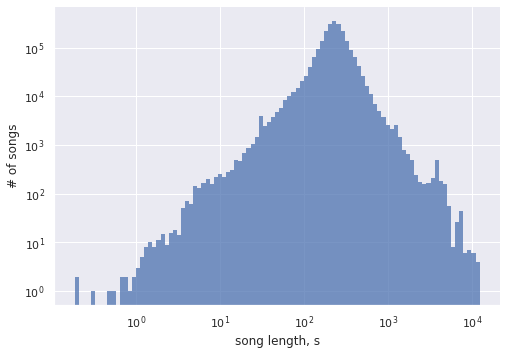

In [ ]:
# sns.set(rc={'figure.figsize':(100,8)})
length_bins = np.logspace(np.log10(min_song_length_sec),np.log10(max_song_length_sec+1),100)
sns.displot(songs.song_length/1000, bins=length_bins, kde=False, height=5, aspect=1.5)
plt.xlabel('song length, s')
plt.ylabel('# of songs')
plt.yscale('log')
plt.xscale('log')
plt.show()

What about genres?

In [ ]:
songs.groupby('genre_ids')['genre_ids'].count()

genre_ids
1000                89
1000|2154|751        6
1007               693
1011             34013
1011|2189|367        4
                 ...  
979               1295
986                577
986|1955             3
993                  3
993|751            578
Name: genre_ids, Length: 1045, dtype: int64

Song can have more than one genre...
Let me figure out exactly how much.

In [ ]:
songs['genre_ids_len'] = songs['genre_ids'].str.split('|').str.len()

In [ ]:
songs.groupby('genre_ids_len')['genre_ids_len'].count()

genre_ids_len
1.0    2029328
2.0     138833
3.0      24064
4.0       8748
5.0       1068
6.0         90
7.0         62
8.0         11
Name: genre_ids_len, dtype: int64

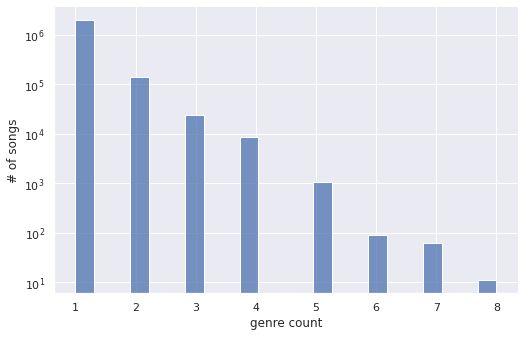

In [ ]:
sns.displot(songs['genre_ids_len'], kde=False, height=5, aspect=1.5)
plt.xlabel('genre count')
plt.ylabel('# of songs')
plt.yscale('log')
plt.show()

What about artist names?  

In [ ]:
songs.groupby('artist_name')['artist_name'].count()

artist_name
 2 THE EXTREME,Master Chief & iLLest Game,,52\nYoTOt7FvGTn4CF/H738WaFyMmJ/1V53FR6pAUEY6OTg=,247248,1609,EU93NE,Eugenio Chiais,Eugenio Chiais,52\nve1P98JDZ5FVZcSByTwLbXfKcwo4AXuzrr2+Nn06Z6M=,275957,2022,Candlebox,,,52\nAB7SHiM3izyDLrAiQYGzJXY5fGbrkHykoQmGqK+ioD0=,464491,2072,Emptyset,Paul Purgas| James Ginzburg,,-1\ngY/e1iWkVIEArqlvjUF9R3A/+H6hbE0Kyd65U6RP1aA=,949975,958,Berliner Philharmoniker/Herbert Von Karajan,Johannes Brahms,,-1\nVT1Xh63/oERxH0hjwFTGIFYPLVmboRe+debxACO9rkQ=,18854,1259,YG,,,52\nNbmn5m1+5rmNhdsAZuCUGB1vQNGj4caYliTPSCUM0t4=,212880,1609,Various Artists,A. Liggett| C. Novelli,,52\nd5O9CIdLt3vVVo/Ndf2u2TFRG4afHznCbkyADdpSEd0=,348392,2122,Everette Harp,,,52\nBxjKxZto2Tc4pTBpdKktm7ZsTQAVUKC8P8znkNgGNDc=,117968,2022,The Mountain Goats,,,52\noeOY3jR+nvmeQ2FcHsYTXc2GXdhXCckJKsKkzyX3Qsk=,210813,465,Natasha Bedingfield,,,52\ndiPYIEHvUUGkItjGStm0wI+BVLSY6jSOCfROo0zgOUc=,60081,1572|275,Warner/Chappell Productions,,,52\nY078Hwgp2C7RO2hkz3kvkDUzAFJfTnFgFqHqNn2XnZI=,2655

Kinda messy two rows...

Next, composers and lyricists

In [ ]:
songs['composer_len'] = songs['composer'].str.split('|').str.len()
songs.groupby('composer_len')['composer_len'].count()

composer_len
1.0     831332
2.0     207660
3.0      93742
4.0      47044
5.0      23868
6.0      10152
7.0       4598
8.0       2955
9.0       1346
10.0       663
11.0       455
12.0       346
13.0       211
14.0       133
15.0        98
16.0        70
17.0        94
18.0        55
19.0        37
20.0        41
21.0        15
22.0         4
23.0         5
24.0         9
25.0         2
26.0         1
27.0         5
28.0        10
29.0         4
30.0         6
31.0         4
51.0         1
Name: composer_len, dtype: int64

In [ ]:
songs['lyricist_len'] = songs['lyricist'].str.split('|').str.len()
songs.groupby('lyricist_len')['lyricist_len'].count()

lyricist_len
1.0     250553
2.0      49850
3.0      25666
4.0      12478
5.0       6460
6.0       2915
7.0       1398
8.0        776
9.0        396
10.0       195
11.0       126
12.0        82
13.0        38
14.0        40
15.0        12
16.0        14
17.0        18
18.0        12
19.0         6
20.0        13
21.0         2
23.0         2
Name: lyricist_len, dtype: int64

And the languages

In [ ]:
songs.groupby('language')['language'].count()

language
-1.0      639467
 3.0      106295
 10.0      15482
 17.0      92518
 24.0      41744
 31.0      39201
 38.0       2385
 45.0      14435
 52.0    1336694
 59.0       8098
Name: language, dtype: int64

## Songs extra info

In [ ]:
songs_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
songs_extra.isna().sum()

song_id         0
name            2
isrc       136548
dtype: int64

Let me check ISRC.  https://en.wikipedia.org/wiki/International_Standard_Recording_Code  
We can extract song's country code and date.

In [ ]:
songs_extra['country_code'] = songs_extra['isrc'].str[:2]

In [ ]:
songs_extra.groupby('country_code')['country_code'].count().sort_values(ascending=False)[:10]

country_code
US    651830
GB    310782
DE    194045
FR    148459
TC    104693
JP    100264
QM     87529
TW     77432
IT     69400
HK     55346
Name: country_code, dtype: int64

In [ ]:
def to_year(val):
  if val != val:
    return np.nan
  year_part = int(val[5:7])
  if year_part > 17:
    return 1900 + year_part
  else:
    return 2000 + year_part

In [ ]:
songs_extra['year'] = songs_extra['isrc'].apply(to_year)

In [ ]:
songs_extra.groupby('year')['year'].count()

year
1918.0      3649
1919.0      2775
1920.0      2629
1921.0      1592
1922.0      1074
           ...  
2013.0    136376
2014.0    211560
2015.0    268266
2016.0    254342
2017.0     29667
Name: year, Length: 100, dtype: int64

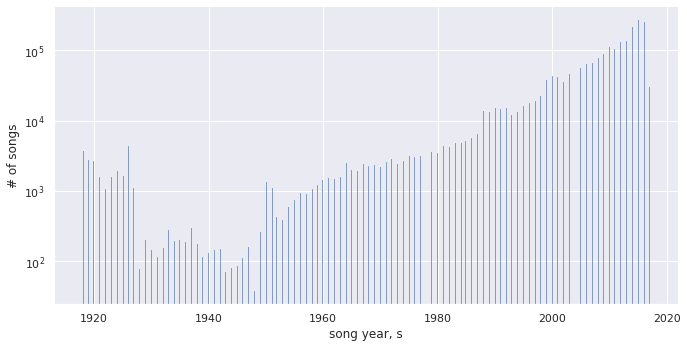

In [ ]:
sns.displot(songs_extra.year, kde=False, height=5, aspect=2)
plt.xlabel('song year, s')
plt.ylabel('# of songs')
plt.yscale('log')
# plt.xscale('log')
plt.show()

## User

In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
members.isna().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [ ]:
members.groupby('city')['city'].count().sort_values(ascending=False)

city
1     19445
13     3395
5      2634
4      1732
15     1525
22     1467
6       913
14      708
12      491
9       309
8       289
11      285
18      259
10      216
21      213
3       204
17      152
7        93
16       35
20       27
19       11
Name: city, dtype: int64

In [ ]:
members['bd'].replace(0,np.NaN, inplace=True)

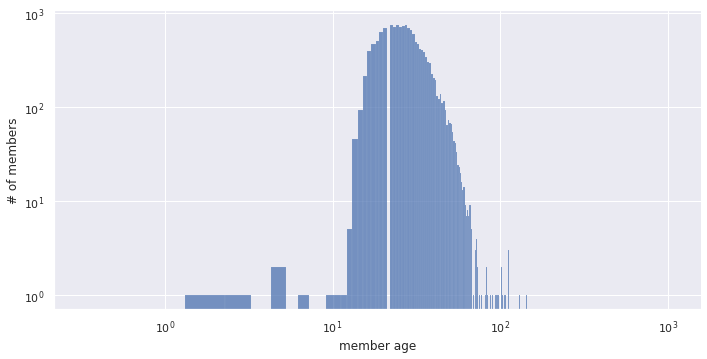

In [ ]:
sns.displot(members.bd, kde=False, height=5, aspect=2)
plt.xlabel('member age')
plt.ylabel('# of members')
plt.yscale('log')
plt.xscale('log')
plt.show()

Need to clear these odd values

In [ ]:
members.groupby('gender')['gender'].count()

gender
female    7096
male      7405
Name: gender, dtype: int64

## Train and test

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [ ]:
train.isna().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [ ]:
train.groupby('source_system_tab')['source_system_tab'].count().sort_values(ascending=False)

source_system_tab
my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

In [ ]:
train.groupby('source_screen_name')['source_screen_name'].count().sort_values(ascending=False)

source_screen_name
Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

In [ ]:
train.groupby('source_type')['source_type'].count().sort_values(ascending=False)

source_type
local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

## NaNs

In [ ]:
def expand_df(df, keys, ad_dfs):
  for k, ad_df in zip(keys, ad_dfs):
    df = df.merge(ad_df, how='left', on=k)
  return df

In [ ]:
keys = ['song_id', 'song_id', 'msno']
dfs = [songs, songs_extra, members]

train_expanded = expand_df(train, keys, dfs)
test_expanded = expand_df(test, keys, dfs)

Are there any NaNs in compare to all rows?

In [ ]:
train_expanded.isna().sum()/train_expanded.shape[0]*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.336825
source_screen_name         5.622618
source_type                0.291959
target                     0.000000
song_length                0.001545
genre_ids                  1.605643
artist_name                0.001545
composer                  22.713990
lyricist                  43.088219
language                   0.002033
name                       0.019749
isrc                       7.832795
city                       0.000000
bd                         0.000000
gender                    40.142486
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [ ]:
test_expanded.isna().sum()/test_expanded.shape[0]*100

id                         0.000000
msno                       0.000000
song_id                    0.000000
source_system_tab          0.330180
source_screen_name         6.370605
source_type                0.285397
song_length                0.000978
genre_ids                  1.646987
artist_name                0.000978
composer                  24.221935
lyricist                  47.901627
language                   0.001643
name                       0.030429
isrc                       7.691011
city                       0.000000
bd                         0.000000
gender                    41.154103
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

NaNs are in Source_system_tab, source_screen_name, source_type, song_length, genre_ids, artist_name, composer, **a lot** in lyricist and in gender, then in language, and finally in ISRC. Overall, let us create for features which have more than 20% NaNs parameter 'Unknown'. For other features with NaNs we will engineer them.

# Feature engineering

## FE before merging

### FE for source... stuff

In [5]:
print('Train\n', train['source_screen_name'].nunique(), train['source_screen_name'].unique())
print('Test\n', test['source_screen_name'].nunique(), test['source_screen_name'].unique())
print('Labels not presented in train\n', set(train['source_screen_name'].unique()) ^ set(test['source_screen_name'].unique()))

Train
 20 ['Explore' 'Local playlist more' nan 'My library' 'Online playlist more'
 'Album more' 'Discover Feature' 'Unknown' 'Discover Chart' 'Radio'
 'Artist more' 'Search' 'Others profile more' 'Search Trends'
 'Discover Genre' 'My library_Search' 'Search Home' 'Discover New'
 'Self profile more' 'Concert' 'Payment']
Test
 22 ['Local playlist more' nan 'Radio' 'Online playlist more' 'Artist more'
 'Discover Genre' 'Album more' 'Discover Chart' 'Discover Feature'
 'Search' 'Unknown' 'Explore' 'Others profile more' 'My library'
 'My library_Search' 'Search Trends' 'Discover New' 'Search Home'
 'Payment' 'Self profile more' 'People local' 'Concert' 'People global']
Labels not presented in train
 {'People global', 'People local'}


In [6]:
def preprocess_source_data(df, test=False):
  # deal with capitalized letters
  df['source_screen_name'] = df['source_screen_name'].str.lower()
  # deal with nans
  for col in ['source_screen_name', 'source_system_tab', 'source_type']:
    df[col] = df[col].fillna('unknown')
  # deal with labels which are not presented in train
  if test:
    df['source_screen_name'].replace(['people local', 'people global'], 'unknown', inplace=True)
  return df

In [7]:
train = preprocess_source_data(train)
test = preprocess_source_data(test, test=True)

### FE for user data

There is more then 40% of NaNs in Gender column of members dataframe, so let us define 2 different ways to treat this column:  
1. assign unknown to NaN value
2. assign random value to it  

Let us add also a column which tells us the amount of membership days of particular person.

In [8]:
def preprocess_user_data(df, gender_rand=False):
  # transform gender to binary
  m = {'male' : 1, 'female' : 0}
  df['gender'] = df['gender'].map(m)
  # deal with nans in gender
  if gender_rand:
    a = df['gender'].values
    m = np.isnan(a) # mask of NaNs
    a[m] = np.random.choice(2, size=m.sum())
  else:
    df['gender'].fillna(2, inplace=True)

  # deal with expiration date 1970y, which is less then registration date
  df.loc[df['expiration_date']<df['registration_init_time'], 'expiration_date'] = df['expiration_date'].quantile(0.5, interpolation="midpoint")
  # add new column membership days
  df['membership_days'] = (df['expiration_date'] - df['registration_init_time']).dt.days.astype(int)

  # make birthdays (actually age) with less than 0 and more than 90 -> 0 (it means unspecified)
  to_remove = df.loc[(df['bd'] < 0) | (df['bd'] > 90), 'bd'].values
  df['bd'].replace(to_remove, 0, inplace=True)

  # add new binary column about "has age info or not" 
  cond = df['bd'] != 0
  df['got_bd'] = np.where(cond, 1, 0)
  
  return df

In [9]:
members = preprocess_user_data(members, gender_rand=False)

#### User country

Let us try to understand which country user is from by the countries of the most popular music for city where is the user from.  
Wiki says that the KKBOX service mainly targets the music markets of East and Southeast Asia, focusing on regions including: Taiwan, Hong Kong, Malaysia, Japan and Singapore, so let us focus only on these countries.

In [22]:
train_expanded['song_country'] = train_expanded['isrc'].str[:2]
test_expanded['song_country'] = test_expanded['isrc'].str[:2]

['GB' 'US' 'QM' 'TW' nan 'BE' 'AR' 'CN' 'HK' 'KR' 'JP' 'DE' 'CA' 'FR' 'IT'
 'NO' 'SE' 'NL' 'DK' 'MY' 'TC' 'SG' 'UK' 'EM' 'ES' 'GM' 'TG' 'CH' 'TE'
 'AU' 'GT' 'PL' 'BR' 'UA' 'GL' 'CY' 'RO' 'IE' 'TH' 'PT' 'NG' 'FI' 'IN'
 'QZ' 'MX' 'VG' 'MT' 'PH' 'NZ' 'TR' 'RU' 'EU' 'TM' 'BX' 'CB' 'CO' 'EG'
 'AT' 'AD' 'BG' 'ZA' 'ID' 'UG' 'GR' 'HR' 'MH' 'IL' 'HU' 'PR' 'JK' 'ZZ'
 'IS' 'WW' 'LB' 'MA' 'CZ' 'MO' 'KI' 'LV' 'NJ' 'DM' 'MK' 'AE' 'LU' 'CL'
 'GY' 'PE' 'IF' 'BZ' 'SK' 'TP' 'UD' 'SA' 'PY' 'BK' 'EE' 'LT' 'UY' 'JM'
 'UZ' 'SI' 'CM' 'OM' 'BY' 'GD' 'YW' 'RS' 'GN' 'IR' 'KE']


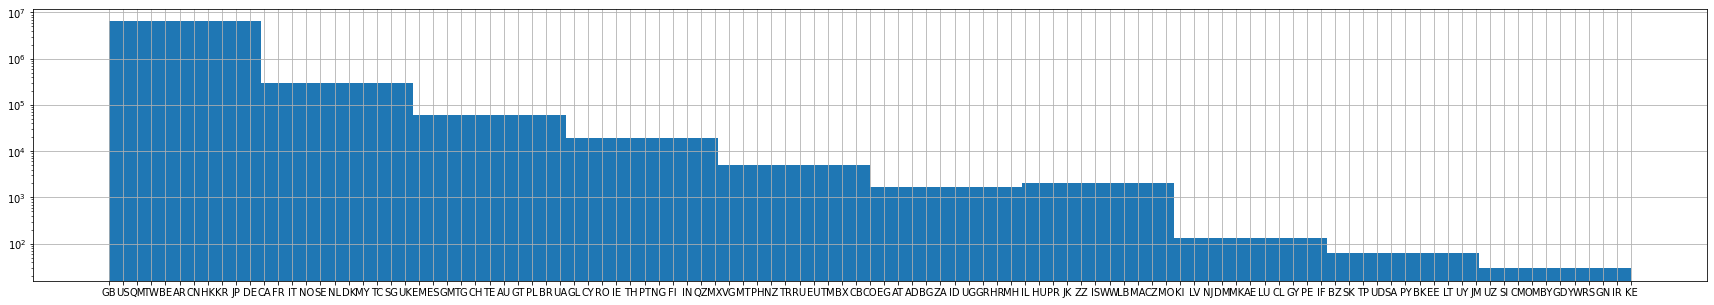

In [ ]:
print(train_expanded['song_country'].unique())
plt.figure(figsize=(30, 5))
train_expanded['song_country'].hist()
plt.yscale('log')
plt.show()

In [ ]:
print(train_expanded['city'].unique())
train_expanded.groupby('city')['city'].count().sort_values(ascending=False)

[ 1 13 15  5  9 21 22 12  4  6 14 17 10  8 11 18  3  7 20 16 19]


city
1     2621293
13    1144863
5      830128
4      545820
15     484078
22     460330
6      275781
14     236639
12     147133
9       95237
8       85734
18      81780
11      71542
10      69158
21      67097
3       63555
17      44688
7       31621
16       7887
19       6961
20       6093
Name: city, dtype: int64

In [ ]:
for city in train_expanded.city.unique():
  print(city)
  top_countries = train_expanded[train_expanded.city == city].groupby('song_country')['song_country'].count().sort_values(ascending=False)[:5]
  print(top_countries)

1
song_country
TW    1230776
US     438629
GB     144910
KR     136895
HK     126121
Name: song_country, dtype: int64
13
song_country
TW    574854
US    184066
HK     58119
GB     57880
KR     57795
Name: song_country, dtype: int64
15
song_country
TW    246223
US     76605
HK     24867
GB     24430
KR     22013
Name: song_country, dtype: int64
5
song_country
TW    380968
US    156196
GB     53079
KR     40531
HK     40074
Name: song_country, dtype: int64
9
song_country
TW    47174
US    15486
GB     4992
HK     4903
KR     4814
Name: song_country, dtype: int64
21
song_country
TW    34015
US    11158
KR     3545
GB     3334
HK     2989
Name: song_country, dtype: int64
22
song_country
TW    231013
US     70881
GB     23281
HK     22506
KR     20090
Name: song_country, dtype: int64
12
song_country
TW    74167
US    21981
KR     7497
GB     7399
HK     7049
Name: song_country, dtype: int64
4
song_country
TW    274985
US     84498
GB     27701
HK     27023
KR     25285
Name: song_country, d

So, there is no meaningful information to extract, mostly all users listen to Taiwan songs

### FE Train Info

In [11]:
def preprocess_main_info(df, test=False, train_df=None):
  # count how many songs did user listened
  df = df.merge(df.groupby('msno')['msno'].count(), 
                left_on='msno', 
                right_index=True, 
                how='left', 
                suffixes=('', '_1'))
  # song popularity by all plays
  df = df.merge(df.groupby('song_id')['song_id'].count(), 
                left_on='song_id', 
                right_index=True, 
                how='left', 
                suffixes=('', '_2'))
  
  df = df.rename(columns={'msno_1':'user_plays',
                          'song_id_2':'song_plays'})
  if not test:
    # target based features 
    # if user tends to repeat the music he listens to
    df = df.merge(df.groupby('msno')['target'].sum(), 
                  left_on='msno', 
                  right_index=True, 
                  how='left', 
                  suffixes=('', '_3'))
    # song popularity by repeats
    df = df.merge(df.groupby('song_id')['target'].sum(), 
                  left_on='song_id', 
                  right_index=True, 
                  how='left', 
                  suffixes=('', '_4'))
        
    df = df.rename(columns={'target_3':'user_repeats',
                            'target_4':'song_repeats'})
    
    df['user_repeat_ratio'] = df['user_repeats']/df['user_plays']
    df['song_repeat_ratio'] = df['song_repeats']/df['song_plays']

  else:
    # if user tends to repeat the music he listens to
    test_list = set(train_df['msno']).intersection(df['msno'])
    test_dict = train_df.loc[train_df['msno'].isin(test_list)][['msno', 'user_repeat_ratio']].set_index('msno').to_dict()
    df['user_repeat_ratio'] = df['msno'].map(test_dict['user_repeat_ratio'])
    # song popularity by repeats
    test_list = set(train_df['song_id']).intersection(df['song_id'])
    test_dict = train_df.loc[train_df['song_id'].isin(test_list)][['song_id', 'song_repeat_ratio']].set_index('song_id').to_dict()
    df['song_repeat_ratio'] = df['song_id'].map(test_dict['song_repeat_ratio'])
    df.drop('id', axis=1, inplace=True)
  return df

In [12]:
train = preprocess_main_info(train)
test = preprocess_main_info(test, True, train)

## Merging

Merging all data for train and test

In [16]:
def expand_df(df, keys, ad_dfs):
  for k, ad_df in zip(keys, ad_dfs):
    df = df.merge(ad_df, how='left', on=k)
  return df

In [17]:
keys = ['song_id', 'song_id', 'msno']
dfs = [songs, songs_extra, members]

train_expanded = expand_df(train, keys, dfs)
test_expanded = expand_df(test, keys, dfs)

In [19]:
train_expanded.isna().sum()/train_expanded.shape[0]

msno                      0.000000
song_id                   0.000000
source_system_tab         0.000000
source_screen_name        0.000000
source_type               0.000000
target                    0.000000
user_plays                0.000000
song_plays                0.000000
user_repeats              0.000000
song_repeats              0.000000
user_repeat_ratio         0.000000
song_repeat_ratio         0.000000
song_length               0.000015
genre_ids                 0.016056
artist_name               0.000015
composer                  0.227140
lyricist                  0.430882
language                  0.000020
name                      0.000197
isrc                      0.078328
city                      0.000000
bd                        0.000000
gender                    0.000000
registered_via            0.000000
registration_init_time    0.000000
expiration_date           0.000000
membership_days           0.000000
got_bd                    0.000000
dtype: float64

In [20]:
test_expanded.isna().sum()/test_expanded.shape[0]

msno                      0.000000
song_id                   0.000000
source_system_tab         0.000000
source_screen_name        0.000000
source_type               0.000000
user_plays                0.000000
song_plays                0.000000
user_repeat_ratio         0.071972
song_repeat_ratio         0.125206
song_length               0.000010
genre_ids                 0.016470
artist_name               0.000010
composer                  0.242219
lyricist                  0.479016
language                  0.000016
name                      0.000304
isrc                      0.076910
city                      0.000000
bd                        0.000000
gender                    0.000000
registered_via            0.000000
registration_init_time    0.000000
expiration_date           0.000000
membership_days           0.000000
got_bd                    0.000000
dtype: float64

In [20]:
# saving all previous dataframes cause it crashed when I merged so tremendous dataframes
train_expanded.to_csv(PATH + 'train_expanded.csv', index=False)
test_expanded.to_csv(PATH + 'test_expanded.csv', index=False)

In [21]:
# read previous dataframes
train_expanded = pd.read_csv(PATH + 'train_expanded.csv', parse_dates=['registration_init_time', 'expiration_date'])
test_expanded = pd.read_csv(PATH + 'test_expanded.csv', parse_dates=['registration_init_time', 'expiration_date'])

In [21]:
# example of dataframe
test_expanded

,msno,song_id,source_system_tab,source_screen_name,source_type,user_plays,song_plays,user_repeat_ratio,song_repeat_ratio,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,membership_days,got_bd
0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,local playlist more,local-library,17,196,0.366197,0.504323,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0,愛其實很殘忍,TWUM71400047,1,0,2.0,7,2016-02-19,2017-09-18,577,0
1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,local playlist more,local-library,17,1479,0.366197,0.624631,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,她說,TWB671005201,1,0,2.0,7,2016-02-19,2017-09-18,577,0
2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,unknown,song-based-playlist,1,2,0.143939,0.400000,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0,subarashiki nichijo,JPWP01070260,1,0,2.0,4,2016-11-17,2016-11-24,7,0
3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,radio,radio,270,14,0.296392,0.225806,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,52.0,Hold Me| Thrill Me| Kiss Me| Kill Me,GBAAN0201228,3,30,1.0,9,2007-07-25,2017-04-30,3567,1
4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,radio,radio,270,3,0.296392,0.400000,197590.0,873,Yoga Mr Sound,Neuromancer,NaN,-1.0,Om Yoga,ITO101121898,3,30,1.0,9,2007-07-25,2017-04-30,3567,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,online playlist more,online-playlist,118,2647,0.237288,NaN,247640.0,1609,The Chainsmokers & Coldplay,Andrew Taggart| Christopher Martin| Will Champ...,Andrew Taggart| Christopher Martin| Will Champ...,52.0,Something Just Like This,USQX91700278,13,41,0.0,9,2010-11-26,2017-09-21,2491,1
2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,unknown,online-playlist,132,2973,0.520161,NaN,197067.0,458,郭美美 (Jocie Guo),小路,小路,3.0,一百種孤獨的理由,CNZ171601130,13,24,1.0,9,2014-05-06,2017-09-12,1225,1
2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,unknown,online-playlist,132,1129,0.520161,0.452381,212950.0,458,問樂團 (Guess What),Skot Suyama陶山/Linkin Park,陳天佑/謝和弦/Linkin Park,3.0,愛不需要裝乖 / Somewhere I Belong,TWCE31600005,13,24,1.0,9,2014-05-06,2017-09-12,1225,1
2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,unknown,online-playlist,132,1690,0.520161,NaN,164414.0,465,陳冠宇 (Kaiel Chen),NaN,NaN,3.0,陳冠宇 (Kuan Yu Chen),TWN711700010,13,24,1.0,9,2014-05-06,2017-09-12,1225,1
